{'hartman': {'Steps': [280000, 500000], 'Time': [3000000, 20000000], 'TimePerStep': [9, 48]}, 'cluster2d2': {'Steps': [2672385, 2672417], 'Time': [1900000, 6100000], 'TimePerStep': [0, 2]}, 'biggs': {'Steps': [1000000, 6900000], 'Time': [5000000, 35000000], 'TimePerStep': [3, 8]}}


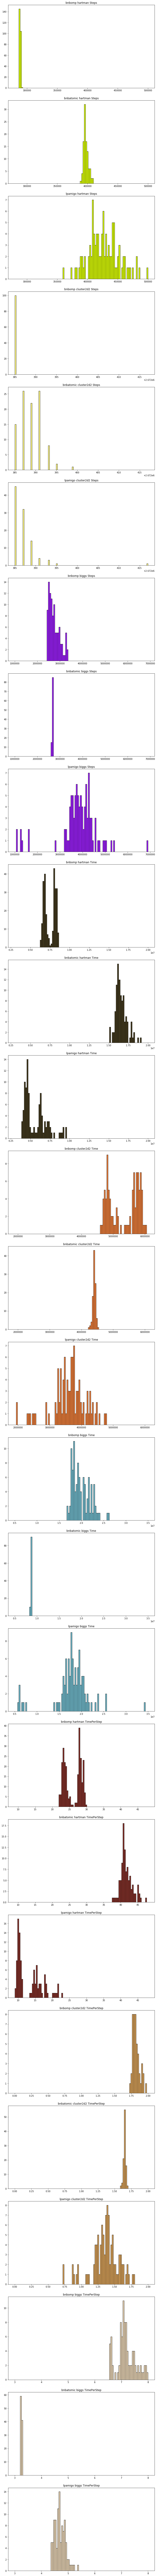

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

TEST_NAMES = [
    'hartman',
    'cluster2d2',
    'biggs',
]
ALGORITHM_NAMES = [
    'bnbomp',
    'bnbatomic',
    'lpamigo',
    #'gpamigo',
]
HIST_PARAMS = [
    'Steps',
    'Time',
    'TimePerStep'
]
TEST_COUNT = len(TEST_NAMES)
ALGO_COUNT = len(ALGORITHM_NAMES)
PARAM_COUNT = len(HIST_PARAMS)
COLORS = [np.random.rand(3,) for i in range(TEST_COUNT * ALGO_COUNT * PARAM_COUNT)]

DATASETS = {}
RANGES = {}

for algo_name in ALGORITHM_NAMES:
    DATASETS[algo_name] = {}
    for test_name in TEST_NAMES:
        file_path = '{}/data_{}.txt'.format(algo_name, test_name)
        dataset = pd.read_csv(file_path, sep=',')
        if test_name not in RANGES.keys():
            RANGES[test_name] = {}
        for param in HIST_PARAMS:
            if param not in RANGES[test_name].keys():
                RANGES[test_name][param] = [1e10, 0]
            if algo_name == 'gpamigo' and test_name == 'biggs':
                continue
                
            RANGES[test_name][param][0] = int(min(RANGES[test_name][param][0], dataset[param].min()))
            RANGES[test_name][param][1] = int(max(RANGES[test_name][param][1], dataset[param].max()))
            if algo_name == ALGORITHM_NAMES[-1]:
                diff = RANGES[test_name][param][1] - RANGES[test_name][param][0]
                digits = len(str(diff)) - 2
                if digits < 0:
                    continue
                power = pow(10, digits)
                RANGES[test_name][param][1] = math.ceil(RANGES[test_name][param][1] / power) * power
                RANGES[test_name][param][0] = math.floor(RANGES[test_name][param][0] / power) * power
      
        DATASETS[algo_name][test_name] = dataset
        

print(RANGES)


fig, axes = plt.subplots(nrows=ALGO_COUNT * PARAM_COUNT * TEST_COUNT, ncols=1)
fig.set_size_inches(10, 6 * (ALGO_COUNT * PARAM_COUNT * TEST_COUNT))

for i, ax in enumerate(axes.flat):
    idx_param = int((i / (ALGO_COUNT * TEST_COUNT)))
    param_name = HIST_PARAMS[idx_param]
    idx_algo = int((i % (ALGO_COUNT * TEST_COUNT)) % ALGO_COUNT)
    algo_name = ALGORITHM_NAMES[idx_algo]
    idx_test = int((i % (ALGO_COUNT * TEST_COUNT)) / ALGO_COUNT)
    test_name = TEST_NAMES[idx_test]

    dataset = DATASETS[algo_name][test_name]
    ax.set_title('{} {} {}'.format(algo_name, test_name, param_name))
    if algo_name == 'gpamigo' and test_name == 'biggs':
        continue
    ax.hist(dataset[param_name], color = COLORS[idx_param * PARAM_COUNT + idx_test], edgecolor = 'black', 
            bins = int(100), range=tuple(RANGES[test_name][param_name]))

    
#for i, ax in enumerate(axes[:,0]):
#    idx_algo = int(i % ALGO_COUNT)
#    algo_name = ALGORITHM_NAMES[idx_algo]
#    ax.set_ylabel(algo_name, size='large', rotation=0)

fig.tight_layout()
plt.show()